| Columna       | Tipo de Variable          | Descripción Breve |
|---------------|---------------------------|-------------------|
| `age`         | Numérica entera           | Edad de la persona en años. |
| `weight`      | Numérica entera           | Peso de la persona en kilogramos. |
| `height`      | Numérica entera           | Altura de la persona en centímetros. |
| `exercise`    | Categórica ordinal        | Nivel de ejercicio físico (none, low, medium, high). |
| `sleep`       | Numérica continua         | Horas promedio de sueño diario. |
| `sugar_intake`| Categórica ordinal        | Nivel de consumo de azúcar (low, medium, high). |
| `smoking`     | Categórica binaria        | Indicador de si la persona fuma (yes, no). |
| `alcohol`     | Categórica binaria        | Indicador de si la persona consume alcohol (yes, no). |
| `married`     | Categórica binaria        | Indicador de si la persona está casada (yes, no). |
| `profession`  | Categórica nominal        | Ocupación de la persona (ej. office_worker, teacher, artist). |
| `bmi`         | Numérica continua         | Índice de masa corporal calculado. |
| `health_risk` | Categórica binaria        | Nivel de riesgo para la salud (low, high). |

In [21]:
from pathlib import Path
import pandas as pd

# Asumiendo que ejecutas el notebook desde la raíz o desde la carpeta notebooks
base_path = Path("..") if Path().cwd().name == "notebooks" else Path(".")
datos_path = base_path / "datos" / "Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv"

df = pd.read_csv(datos_path)

In [22]:
# Numero de filas y columnas
print("Numero de filas : " , df.shape[0])
print("Numero de columnas : " , df.shape[1])
# Celdas vacias
print('Celdas vacias' , df.isnull().sum())

Numero de filas :  5000
Numero de columnas :  12
Celdas vacias age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64


In [23]:
# Resumen de las columnas + datos unicos por columna

print(f"{str("-----"*9):^50}")
print(f"|{"Columna":^25} | {"Tipo":^10} | {"Unicos":^5}| ")
print(f"{str("-----"*9):^50}")
for name_col in df:
    print(f"|{name_col:<25} | {str(df[name_col].dtype):<10} | {str(df[name_col].nunique()):<5} |")
print(f"{str("-----"*9):^50}")



  ---------------------------------------------   
|         Columna          |    Tipo    | Unicos| 
  ---------------------------------------------   
|age                       | int64      | 62    |
|weight                    | int64      | 65    |
|height                    | int64      | 55    |
|exercise                  | object     | 4     |
|sleep                     | float64    | 71    |
|sugar_intake              | object     | 3     |
|smoking                   | object     | 2     |
|alcohol                   | object     | 2     |
|married                   | object     | 2     |
|profession                | object     | 8     |
|bmi                       | float64    | 383   |
|health_risk               | object     | 2     |
  ---------------------------------------------   


In [24]:
# Convertir en categoricas las columnas que tienen pocos valores unicos
columnas_a_categoricas = ['exercise','sugar_intake','smoking', 'alcohol','married','profession','health_risk']
for col in columnas_a_categoricas:
    df[col] = df[col].astype('category')

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   int64   
 1   weight        5000 non-null   int64   
 2   height        5000 non-null   int64   
 3   exercise      5000 non-null   category
 4   sleep         5000 non-null   float64 
 5   sugar_intake  5000 non-null   category
 6   smoking       5000 non-null   category
 7   alcohol       5000 non-null   category
 8   married       5000 non-null   category
 9   profession    5000 non-null   category
 10  bmi           5000 non-null   float64 
 11  health_risk   5000 non-null   category
dtypes: category(7), float64(2), int64(3)
memory usage: 230.8 KB


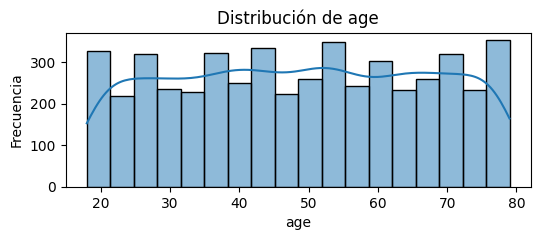

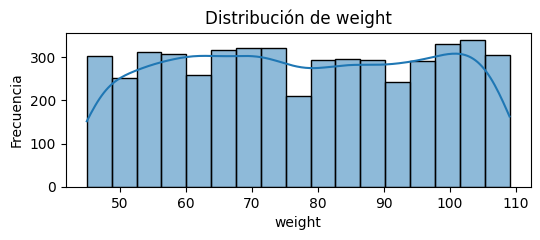

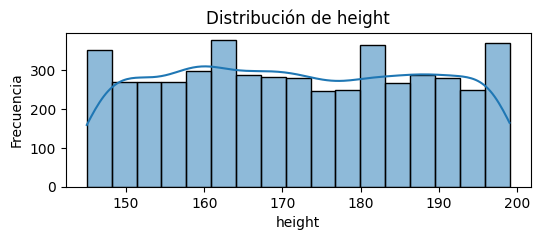

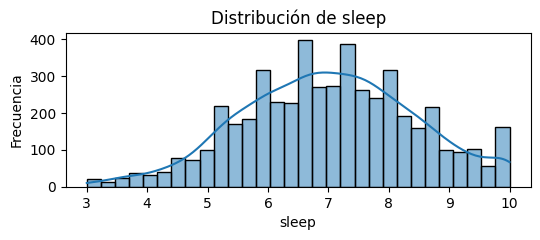

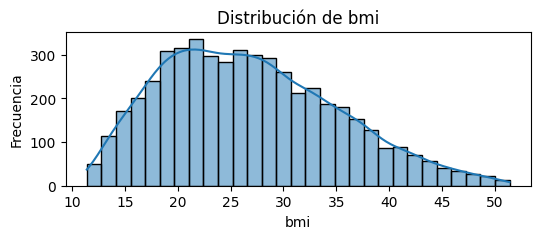

In [26]:
# Graficas de distribucion para variables numericas
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

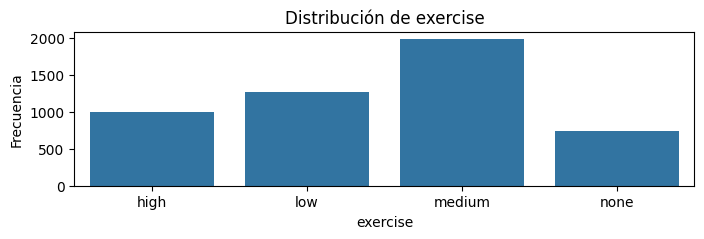

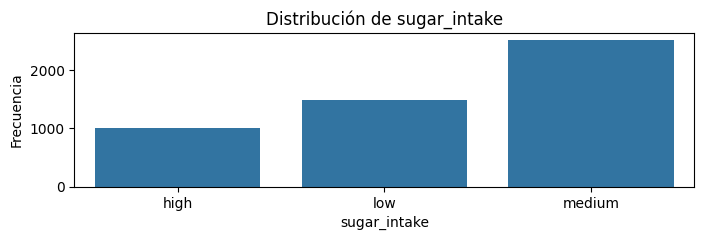

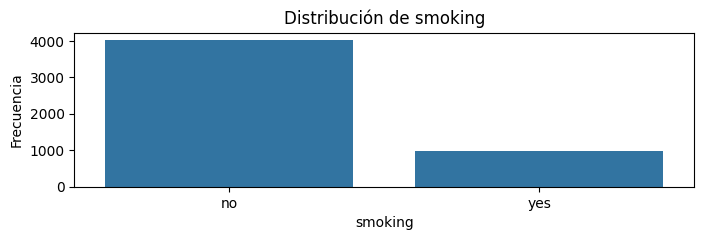

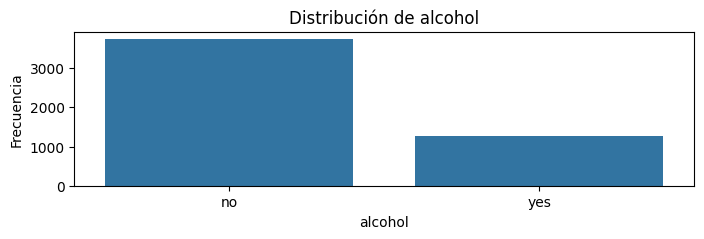

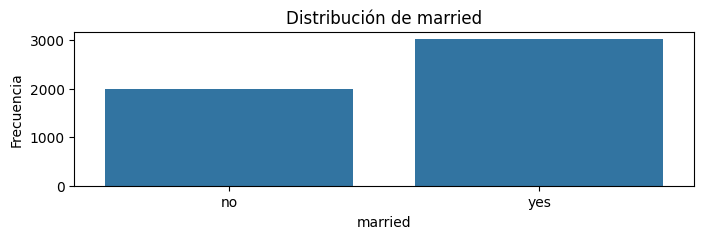

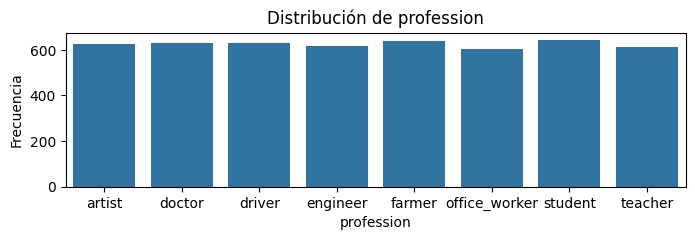

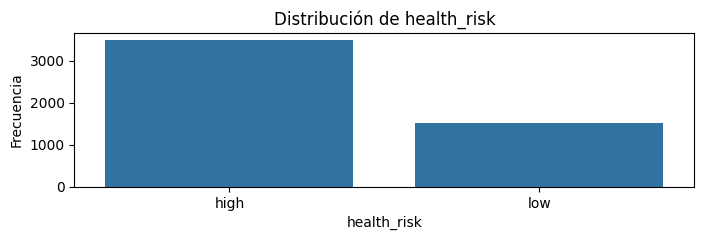

In [27]:
# Graficas de distribucion para variables categoricas

categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 2))
    sns.countplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

## ANALISIS
- Se ve que las columnas que tienen dos variables se puede transformar en binarias y poder hacer una mejor exploracion.
- la variable objetivo es health_risk

In [28]:
# convertir en binarias las columnas que tienen dos valores unicos
columnas_a_binarias = ['smoking', 'alcohol', 'married', 'health_risk']
for col in columnas_a_binarias:
    df[col] = df[col].cat.codes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   int64   
 1   weight        5000 non-null   int64   
 2   height        5000 non-null   int64   
 3   exercise      5000 non-null   category
 4   sleep         5000 non-null   float64 
 5   sugar_intake  5000 non-null   category
 6   smoking       5000 non-null   int8    
 7   alcohol       5000 non-null   int8    
 8   married       5000 non-null   int8    
 9   profession    5000 non-null   category
 10  bmi           5000 non-null   float64 
 11  health_risk   5000 non-null   int8    
dtypes: category(3), float64(2), int64(3), int8(4)
memory usage: 230.3 KB


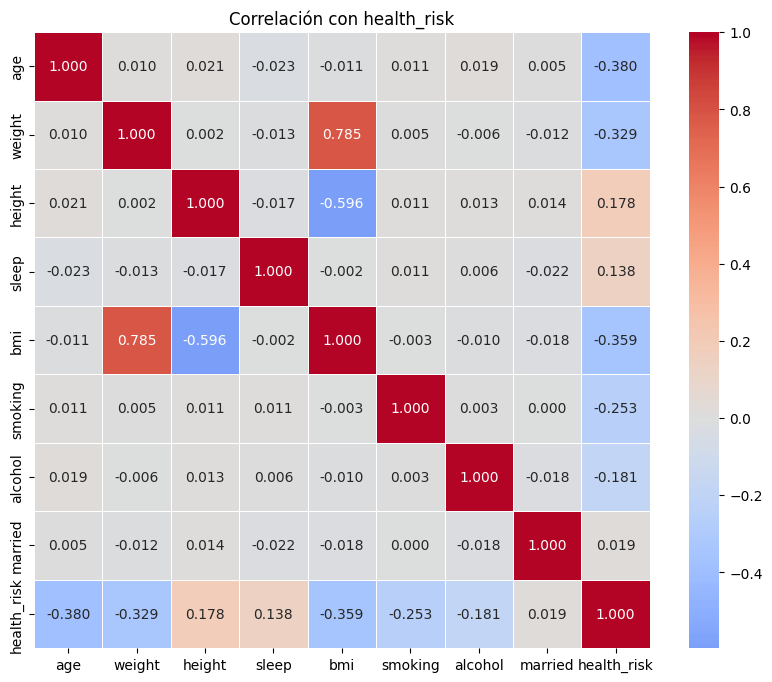


--- EXERCISE vs health_risk ---
health_risk      0      1
exercise                 
high         0.609  0.391
low          0.837  0.163
medium       0.606  0.394
none         0.826  0.174


<Figure size 800x400 with 0 Axes>

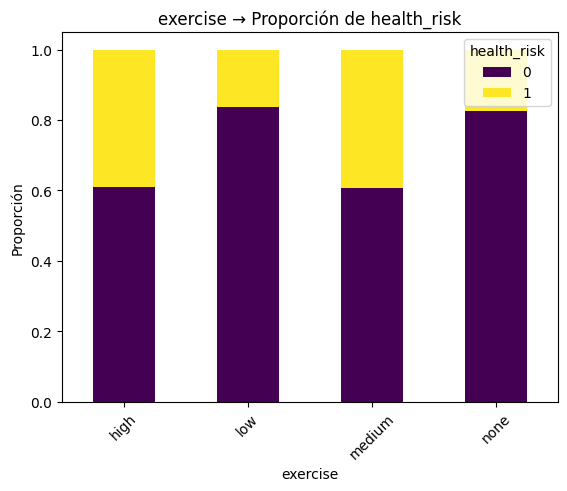


--- SUGAR_INTAKE vs health_risk ---
health_risk       0      1
sugar_intake              
high          0.841  0.159
low           0.666  0.334
medium        0.659  0.341


<Figure size 800x400 with 0 Axes>

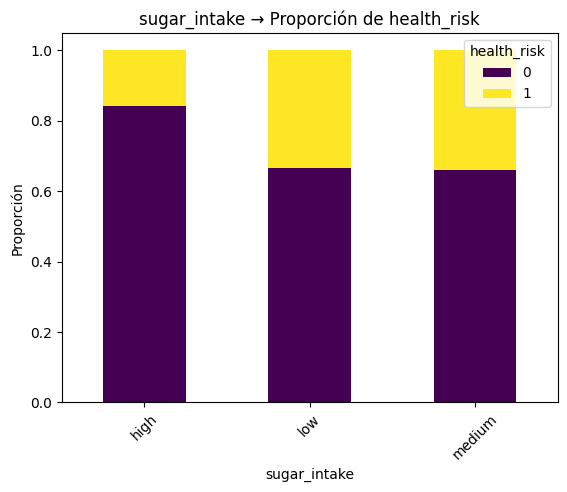


--- PROFESSION vs health_risk ---
health_risk        0      1
profession                 
artist         0.687  0.313
doctor         0.665  0.335
driver         0.724  0.276
engineer       0.709  0.291
farmer         0.692  0.308
office_worker  0.699  0.301
student        0.700  0.300
teacher        0.708  0.292


<Figure size 800x400 with 0 Axes>

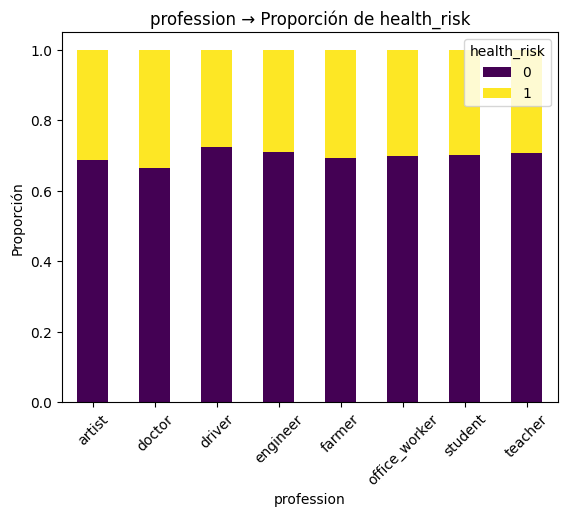

In [35]:

# 1. Heatmap de TODAS las variables numéricas/binarias
cols_to_check = ['age', 'weight', 'height', 'sleep', 'bmi', 
                 'smoking', 'alcohol', 'married', 'health_risk']

plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_to_check].corr(), 
            annot=True, cmap='coolwarm', center=0, fmt='.3f', 
            square=True, linewidths=.5)
plt.title("Correlación con health_risk")
plt.show()

# 2. Análisis de variables categóricas
categorical_cols = ['exercise', 'sugar_intake', 'profession']

for col in categorical_cols:
    print(f"\n--- {col.upper()} vs health_risk ---")
    crosstab = pd.crosstab(df[col], df['health_risk'], normalize='index')
    print(crosstab.round(3))
    
    # Gráfico
    plt.figure(figsize=(8, 4))
    crosstab.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f"{col} → Proporción de health_risk")
    plt.ylabel("Proporción")
    plt.legend(title="health_risk")
    plt.xticks(rotation=45)
    plt.show()

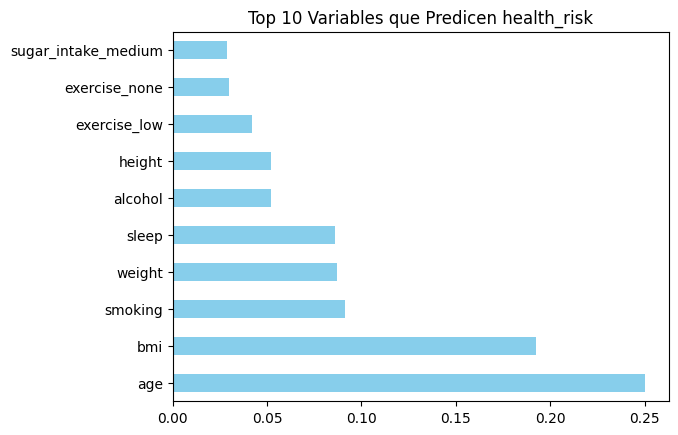

In [37]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('health_risk', axis=1)
y = df['health_risk']

# Convertir categóricas a numéricas
X_encoded = pd.get_dummies(X, drop_first=True)

model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Variables que Predicen health_risk")
plt.show()